__Rough Work__

Here I will try and recreate the algorithm for a single neuron model from the paper

In [2]:
import random as r
import numpy as np
import math as m
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
def neuron_walk(angle_lower_bound,angle_upperbound,T,lambd):
    t=0;
    T_v=np.array(np.array([0,0]))
    N=0;
    while t<T:
        theta = r.uniform(angle_lower_bound,angle_upperbound)
        branch_time = r.expovariate(lambd)
        v=T_v[N]+np.array([branch_time*m.cos(theta),branch_time*m.sin(theta)])
        N+=1
        T_v=np.vstack((T_v,v))
        t+=branch_time
    return(T_v)

In [5]:
walk = neuron_walk(-m.pi/6,m.pi/6,10,1)

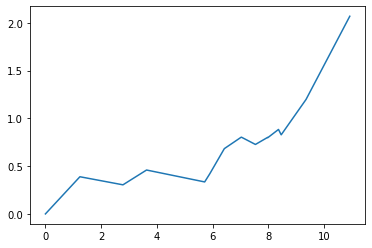

In [6]:
plt.plot(walk[:,0],walk[:,1])

In [9]:
def neuron(angle_lower_bound,angle_upperbound,T,lambd):
    t=0;
    w0 = np.array(np.array([0,0]))
    T_v=[w0]
    while t<T:
        branch_time = r.expovariate(lambd)
        for i in range(0,len(T_v)):
            w = T_v[i]
            N=len(w)-1
            theta1 = r.uniform(angle_lower_bound,angle_upperbound)
            theta2 = r.uniform(angle_lower_bound,angle_upperbound)
            direct=[]
            for j in range(0,4):
                direct.append(r.choice([-1,1]))
            v1=w[N]+np.array([branch_time*direct[0]*m.cos(theta1),branch_time*direct[1]*m.sin(theta1)])
            v2=w[N]+np.array([branch_time*direct[2]*m.cos(theta2),branch_time*direct[3]*m.sin(theta2)])
            w1=np.vstack((w,v1))
            w2=np.vstack((w,v2))
            T_v[i]=w1
            T_v.append(w2)
        t+=branch_time
    return(T_v)

In [10]:
tree1 = neuron(0,2*m.pi,10,1)

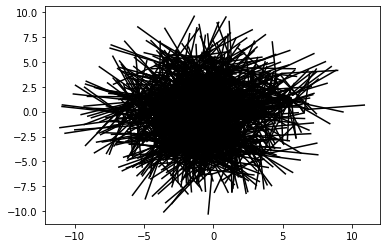

In [11]:
for walk in tree1:
    plt.plot(walk[:,0],walk[:,1],'k')

In [12]:
def single_neuron_model(angle_lower_bound,angle_upperbound,T,lambd):

    #First branch
    initial_pos = np.array([0,0])
    theta = r.uniform(angle_lower_bound,angle_upperbound)
    t = r.expovariate(lambd)
    v=initial_pos+np.array([t*m.cos(theta),t*m.sin(theta)])
    w0=np.vstack((initial_pos,v))
    T_v=[w0]
    directions=[theta]

    #Successive branches
    while t<T:
        branch_time = r.expovariate(lambd)
        for i in range(0,len(T_v)):
            w = T_v[i]
            N=len(w)-1
            theta1 = r.uniform(angle_lower_bound,angle_upperbound)
            theta2 = r.uniform(angle_lower_bound,angle_upperbound)
            directions.append(directions[i]+theta2)
            directions[i]+=theta1
            v1=w[N]+np.array([branch_time*m.cos(directions[i]),branch_time*m.sin(directions[i])])
            v2=w[N]+np.array([branch_time*m.cos(directions[i+1]),branch_time*m.sin(directions[i+1])])
            w1=np.vstack((w,v1))
            w2=np.vstack((w,v2))
            T_v[i]=w1
            T_v.append(w2)
        t+=branch_time
    return(T_v)

In [13]:
tree = single_neuron_model(-m.pi/10,m.pi/10,8,1)

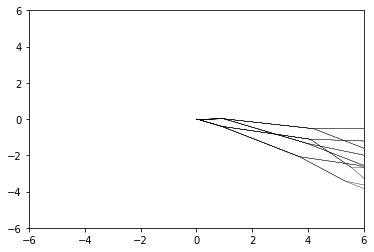

In [14]:
for walk in tree:
    plt.xlim(-6,6)
    plt.ylim(-6,6)
    plt.plot(walk[:,0],walk[:,1],'k',linewidth=0.2)

In [15]:
print(len(tree))

32


In [16]:
def single_neuron_model2(angle_lower_bound,angle_upperbound,T,lambd):

    #First branch
    initial_pos = np.array([0,0])
    theta = r.uniform(angle_lower_bound,angle_upperbound)
    t = r.expovariate(lambd)
    v=initial_pos+np.array([t*m.cos(theta),t*m.sin(theta)])
    w0=np.vstack((initial_pos,v))
    T_v=[w0]
    theta1 = r.uniform(angle_lower_bound,angle_upperbound)
    theta2 = r.uniform(angle_lower_bound,angle_upperbound)
    growing_directions=[np.array([theta1,theta2])]
    endpoints = [v]
    current_direction=[theta]
    
    while t<T:
        next_branch_time = r.expovariate((1/(2*len(endpoints)*lambd)))
        endpoint = r.randint(0,len(T_v)-1)
        branch = r.randint(0,1)
        walk = T_v[endpoint]
        pos = endpoints[endpoint]
        new_direction = growing_directions[endpoint][branch]
        new_pos=pos+np.array([next_branch_time*m.cos(current_direction[endpoint]+new_direction),next_branch_time*m.sin(current_direction[endpoint]+new_direction)])
        
        walk=np.vstack((walk,new_pos))
        T_v.append(walk)
        endpoints[endpoint]=new_pos
        current_direction[endpoint]+=new_direction
        
        theta1 = r.uniform(angle_lower_bound,angle_upperbound)
        theta2 = r.uniform(angle_lower_bound,angle_upperbound)
        growing_directions[endpoint]=np.array([theta1,theta2])
        t+=next_branch_time

    return(T_v)

        
        
        
        



In [17]:
tree = single_neuron_model2(-m.pi/6,m.pi/6,8,1)

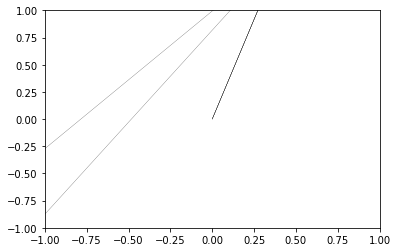

In [18]:
for walk in tree:
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.plot(walk[:,0],walk[:,1],'k',linewidth=0.2)

In [27]:
def growingneuron(angle_lower_bound,angle_upperbound,T,lambd,initial_position):
    start_pos = np.array(initial_position)
    direction = r.uniform(angle_lower_bound,angle_upperbound)
    growing_axons =[[start_pos,direction,0]]
    t=0;
    edges =[]
    while t<T:
        tau = np.random.exponential(1/(lambd*len(growing_axons)))
        t+=tau
        axon_index = r.randint(0,len(growing_axons)-1)
        axon = growing_axons[axon_index]
        new_pos=axon[0]+np.array([(t-axon[2])*m.cos(axon[1]),(t-axon[2])*m.sin(axon[1])])
        edge =[axon[0],new_pos]
        edges.append(edge)        
        x_values=[axon[0][0],new_pos[0]]
        y_values=[axon[0][1],new_pos[1]]
        plt.plot(x_values,y_values,'k',linewidth=0.4)
        
        new_direction1 = r.uniform(angle_lower_bound,angle_upperbound)+axon[1]
        new_direction2 = r.uniform(angle_lower_bound,angle_upperbound)+axon[1]
        growing_axons.pop(axon_index)
        growing_axons.append([new_pos,new_direction1,t])
        growing_axons.append([new_pos,new_direction2,t])
    
    for axon in growing_axons:
        if axon[2]<T:
            new_pos=axon[0]+np.array([(T-axon[2])*m.cos(axon[1]),(T-axon[2])*m.sin(axon[1])])
            edge = [axon[0],new_pos]
            edges.append(edge)
            x_values=[axon[0][0],new_pos[0]]
            y_values=[axon[0][1],new_pos[1]]
            plt.plot(x_values,y_values,'k',linewidth=0.4)
    return(edges)

        
        

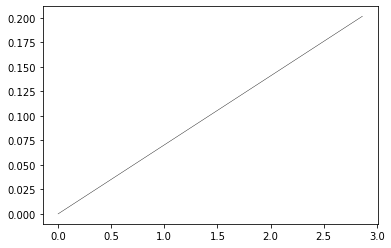

In [5]:
edges1 =growingneuron(-m.pi/6,m.pi/6,1,1,[0,0])

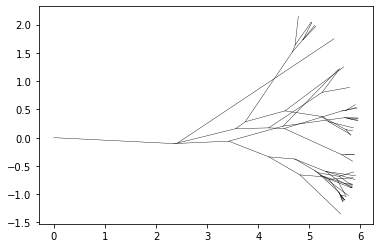

In [5]:
edges2 =growingneuron(-m.pi/6,m.pi/6,6,1,[0,0])

In [6]:
def dist_point_to_segment(P2,P1,P):
    u = ((P[0]-P1[0])*(P2[0]-P1[0])+(P[1]-P1[1])*(P2[1]-P1[1]))/(m.sqrt((P2[0]-P1[0])**2 + (P2[1]-P1[1])**2))
    if u > 1:
        u = 1
    elif u < 0:
        u = 0
    x = P1[0]+u*(P2[0]-P1[0])
    y = P1[1]+u*(P2[1]-P1[1])
    return (m.sqrt((x-P[0])**2 + (y-P[1])**2))
    
def dist_tree_to_vtx(tree_edges,v):
    d=1000
    for edge in tree_edges:
        u = dist_point_to_segment(edge[0],edge[1],v)
        if u<d:
            d=u
    return(d)

def are_vtx_connected(edges_tree_for_v,w,radius):
    dist = dist_tree_to_vtx(edges_tree_for_v,w)
    if dist<=radius:
        return(True)
    else:
        return(False)
        

In [8]:
dist_point_to_segment([0,0],[0,1],[1,2])

1.4142135623730951

In [121]:
are_vtx_connected(edges1,np.array([0,3]),3)

False

In [7]:
def length_of_tree(tree_edges):
    L =0
    for edge in tree_edges:
        L+=m.sqrt((edge[0][0]-edge[1][0])**2 + (edge[0][1]-edge[1][1])**2)
    return(L)

In [127]:
length_of_tree(edges1)

2.8130466804954617

In [128]:
edges1

[[[0, 0], array([ 2.50815761, -1.27372566])]]

In [129]:
2.50815761**2 + 1.27372566**2

7.913231653543348

In [130]:
m.sqrt(7.913231653543348)

2.8130466852761877

In [8]:
#Generating random soma in the space [-x,x]x[-y,y]
def generateSoma(mu,x_range,y_range):
    mu=0.4
    x_range =[-5,5]
    y_range =[-5,5]

    area = (y_range[1]-y_range[0])*(x_range[1]-x_range[0])
    numberOfSoma = np.random.poisson(mu*area)

    #Distributing the soma randomly in space
    x_pos=np.random.uniform(x_range[0],x_range[1],numberOfSoma)
    y_pos=np.random.uniform(y_range[0],y_range[1],numberOfSoma)
    soma =[]
    for i in range(0,numberOfSoma):
        soma.append([x_pos[i],y_pos[i]])
    return([soma,x_pos,y_pos])


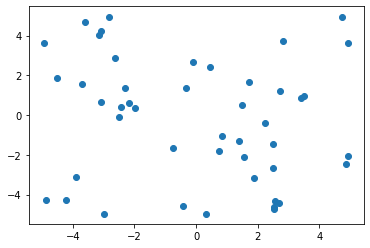

In [9]:
somaPositions = generateSoma(0.4,[-5,5],[-5,5])
plt.scatter(somaPositions[1],somaPositions[2])

In [10]:
def growRandomNetwork(mu,x_range,y_range,angle_lowerbound,angle_upperbound,T,lamb,radius):
    soma = generateSoma(mu,x_range,y_range)
    trees =[]
    somaPositions = soma[0]
    for v in somaPositions:
        edges=growingneuron(angle_lowerbound,angle_upperbound,T,lamb,v)
        trees.append(edges)

    adjacencyMatrix =[]

    for v in somaPositions:
        v_connections =[]
        for tree in trees:
            if are_vtx_connected(tree,v,radius):
                v_connections.append(1)
            else:
                v_connections.append(0)
        adjacencyMatrix.append(v_connections)

    for i in range(0,len(somaPositions)):
        #remove self connections
        adjacencyMatrix[i][i]=0
    return(adjacencyMatrix)

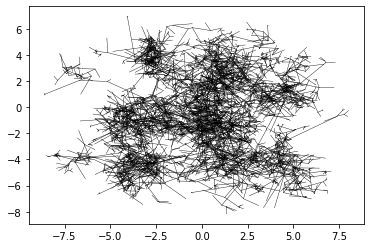

In [11]:
adjMatrix = growRandomNetwork(0.4,[-5,5],[-5,5],-m.pi,m.pi,4,1,1)

In [44]:
#Graph tools
def makeGraph(adj):
    N=len(adj)
    G = nx.DiGraph() 
    for i in range(0,N): 
         for j in range(0,N): 
                if adj[i][j] == 1: 
                    G.add_edge(i,j)
    return(G)

def plotGraph(G):
    nx.draw(G)
    plt.show()

def circlePlotGraph(G):
    nx.draw_circular(G)
    plt.show()

def averageDegree(G):
    K = 0
    for node in G.nodes():
        K+=G.degree(node)
    return(K/G.number_of_nodes())

def basicAnalysisGraph(G):
    print("Nodes: " + str(G.number_of_nodes()))
    print("Edges: " + str(G.number_of_edges()))
    print("Average degree: " + str(averageDegree(G)))

def plotDegreeDistribution(G):
    degrees = [G.degree(n) for n in G.nodes()]
    plt.hist(degrees)
    plt.show()

    

In [45]:
basicAnalysisGraph(G)

Nodes: 50
Edges: 410
Average degree: 16.4


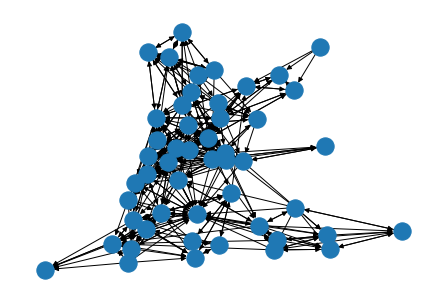

In [13]:
plotGraph(makeGraph(adjMatrix))

In [20]:
G=makeGraph(adjMatrix)

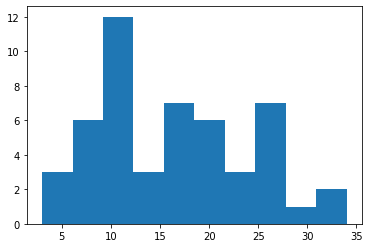

In [26]:
plotDegreeDistribution(G)

50

In [47]:
def dynamicGrowingNeuron(angle_lower_bound,angle_upperbound,T,lambd,initial_position,h):
    plt.show()
    snapshots =[[]]
    start_pos = np.array(initial_position)
    direction = r.uniform(angle_lower_bound,angle_upperbound)
    growing_axons =[[start_pos,direction,0]]
    t=0;
    edges =[]
    while t<T:
        if len(snapshots)*h<t:
            snapshots.append(edges)
        tau = np.random.exponential(1/(lambd*len(growing_axons)))
        t+=tau
        axon_index = r.randint(0,len(growing_axons)-1)
        axon = growing_axons[axon_index]
        new_pos=axon[0]+np.array([(t-axon[2])*m.cos(axon[1]),(t-axon[2])*m.sin(axon[1])])
        edge =[axon[0],new_pos]
        edges.append(edge)        
        x_values=[axon[0][0],new_pos[0]]
        y_values=[axon[0][1],new_pos[1]]
        plt.plot(x_values,y_values,'k',linewidth=0.4)
        
        new_direction1 = r.uniform(angle_lower_bound,angle_upperbound)+axon[1]
        new_direction2 = r.uniform(angle_lower_bound,angle_upperbound)+axon[1]
        growing_axons.pop(axon_index)
        growing_axons.append([new_pos,new_direction1,t])
        growing_axons.append([new_pos,new_direction2,t])
    
    for axon in growing_axons:
        if axon[2]<T:
            new_pos=axon[0]+np.array([(T-axon[2])*m.cos(axon[1]),(T-axon[2])*m.sin(axon[1])])
            edge = [axon[0],new_pos]
            edges.append(edge)
            x_values=[axon[0][0],new_pos[0]]
            y_values=[axon[0][1],new_pos[1]]
            plt.plot(x_values,y_values,'k',linewidth=0.4)
    return(snapshots)

        

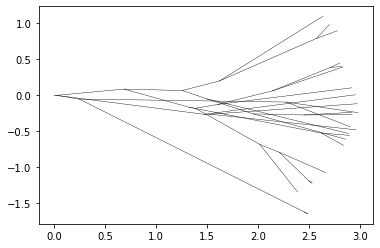

In [53]:
snapshots =dynamicGrowingNeuron(-m.pi/6,m.pi/6,3,1,[0,0],0.5)

6